In [0]:
import pandas as pd

In [33]:
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

print(tr.shape)
print(te.shape)

(891, 12)
(418, 11)


In [3]:
tr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch']

X_tr = tr[sel]
y_tr = tr['Survived']
X_te = te[sel]

In [0]:
mo = LogisticRegression()

In [10]:
mo.fit(X_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
predictions = mo.predict(X_te)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [0]:
te_passengerId = te['PassengerId']
pred = predictions.astype(int)
df_pred = pd.DataFrame({'PassengerId' : te_passengerId, 'Survived' : pred})
df_pred.to_csv('logistic_first_model.csv', index=False)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

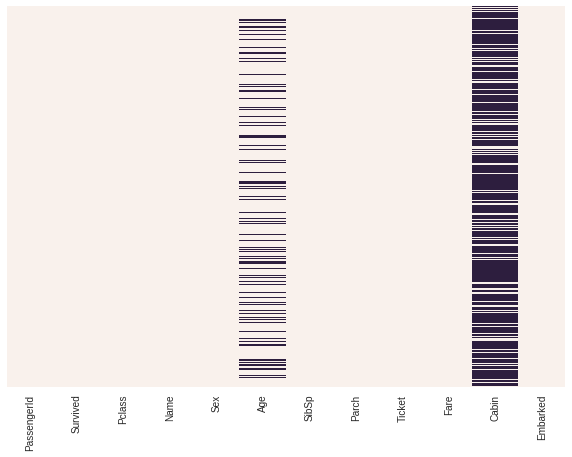

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(tr.isnull(), yticklabels = False, cbar = False)

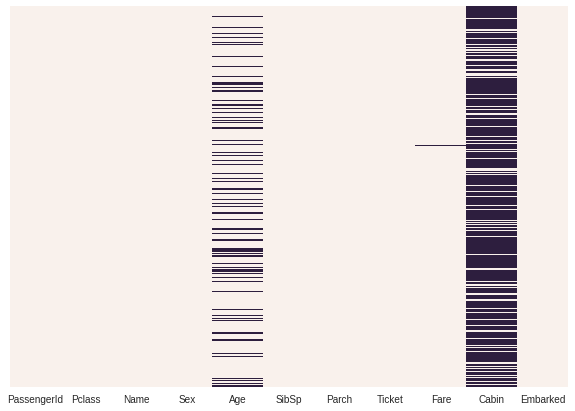

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(te.isnull(), yticklabels=False, cbar=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


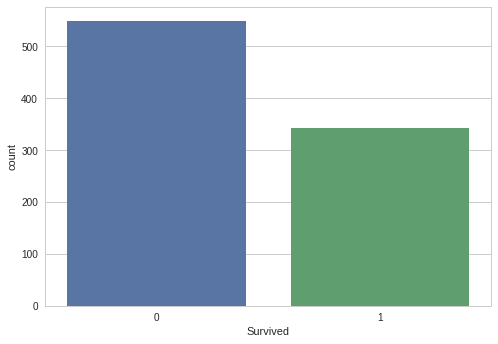

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=tr)

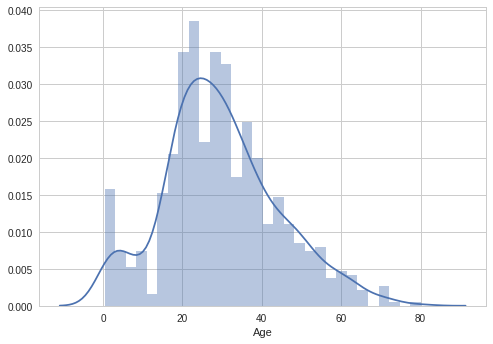

In [39]:
sns.distplot(tr['Age'].dropna(), bins=30)

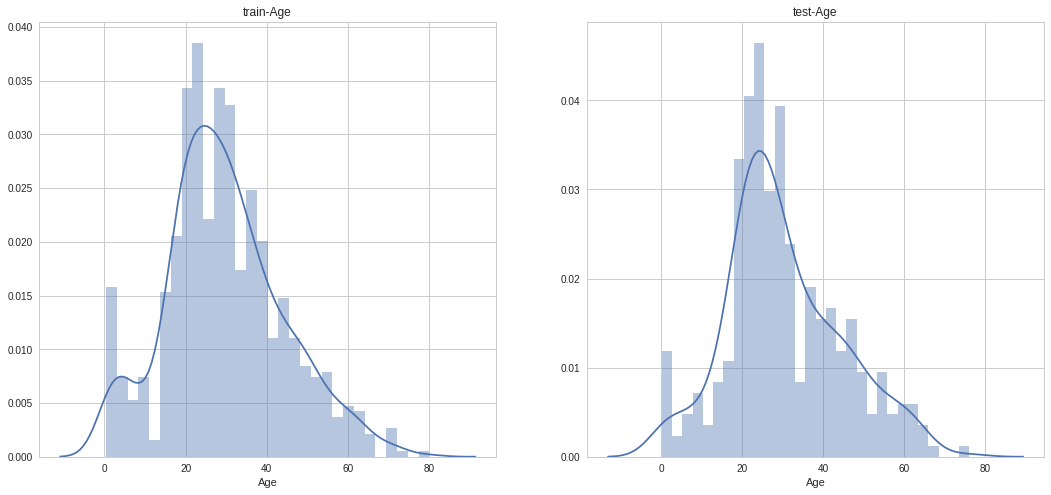

In [40]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.distplot(tr['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train-Age')

sns.distplot(te['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test-Age')
plt.show()

In [0]:
tr['Age'] = tr['Age'].fillna(tr['Age'].mean())
te['Age'] = te['Age'].fillna(te['Age'].mean())

In [42]:
print(tr.isnull().sum())
print(te.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [43]:
tr['Embarked'].value_counts()
val_Embarked = tr['Embarked'].value_counts()
val_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
tr['Embarked'] = tr['Embarked'].fillna('S')

In [45]:
te['Fare'] = te['Fare'].fillna(te['Fare'].mean())
print(tr.isnull().sum())
print(te.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
tr['Sex'] = tr['Sex'].map({'female':0, 'male':1}).astype(int)
te['Sex'] = te['Sex'].map({'female':0, 'male':1}).astype(int)

tr['Embarked'] = tr['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
te['Embarked'] = te['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [0]:
tr['Age'] = tr['Age'].astype('int')
te['Age'] = te['Age'].astype('int')

In [48]:
print(tr.columns)
print(tr.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 83.6+ KB
None


In [0]:
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

X_tr = tr[sel]
y_tr = tr['Survived']
X_te = te[sel]

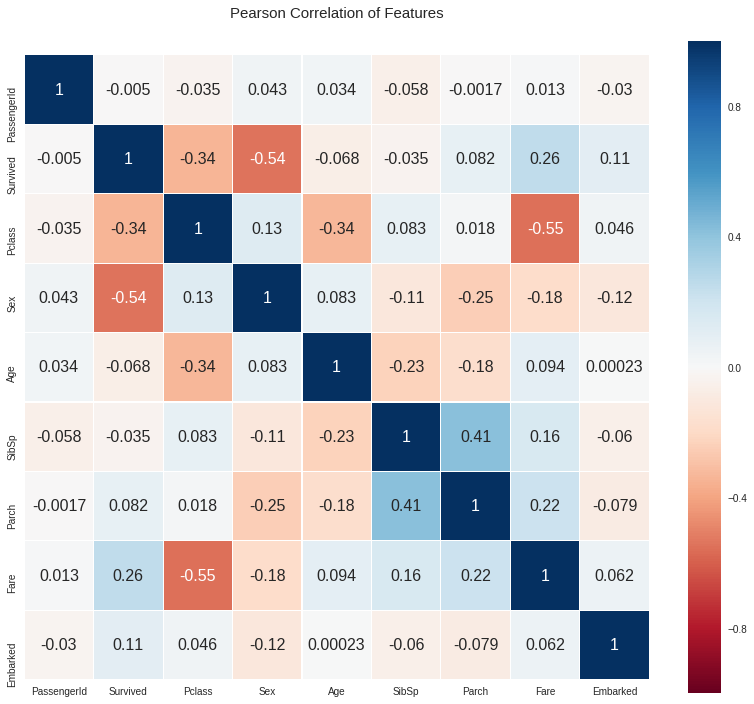

In [50]:
colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(tr.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

In [51]:
from sklearn.linear_model import LogisticRegression
print(X_tr.columns)
print(X_te.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [52]:
mo = LogisticRegression()
mo.fit(X_tr, y_tr)
predictions = mo.predict(X_te)
predictions[:15]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [0]:
te_passengerId = te['PassengerId']
pred = predictions.astype(int)
df_pred = pd.DataFrame({'PassengerId':te_passengerId, 'Survived':pred})
df_pred.to_csv('logistic_second_model.csv', index=False)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


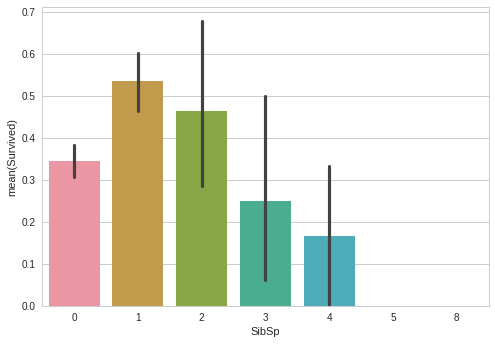

In [56]:
sns.barplot(x='SibSp', y='Survived', data=tr)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


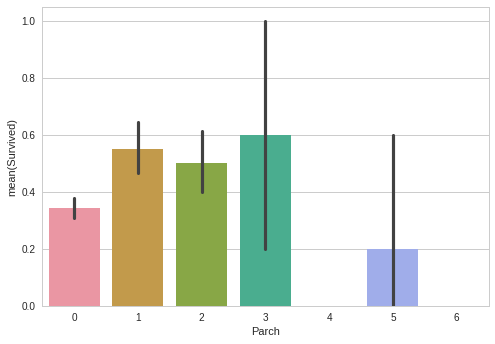

In [58]:
sns.barplot(x='Parch', y='Survived', data=tr)
plt.show()

In [0]:
tr['Age'] = tr['Age'].fillna(-0.5)
te['Age'] = te['Age'].fillna(-0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


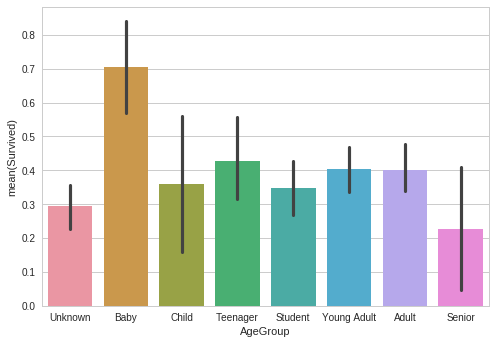

In [61]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
tr['AgeGroup'] = pd.cut(tr['Age'], bins, labels = labels)
te['AgeGroup'] = pd.cut(te['Age'], bins, labels = labels)

sns.barplot(x='AgeGroup', y='Survived', data=tr)
plt.show()

In [62]:
tr['Cabin'].notnull().astype('int')

0      0
1      1
2      0
3      1
4      0
5      0
6      1
7      0
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     1
24     0
25     0
26     0
27     1
28     0
29     0
      ..
861    0
862    1
863    0
864    0
865    0
866    0
867    1
868    0
869    0
870    0
871    1
872    1
873    0
874    0
875    0
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


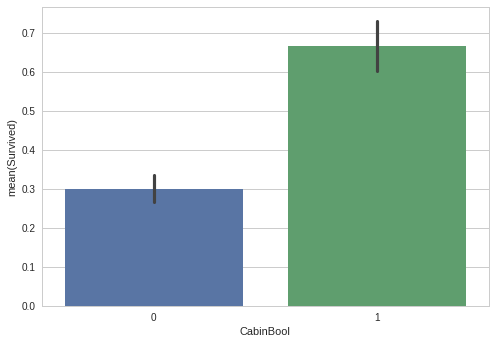

In [63]:
tr['CabinBool'] = (tr['Cabin'].notnull().astype('int'))
te['CabinBool'] = (te['Cabin'].notnull().astype('int'))
sns.barplot(x='CabinBool', y='Survived', data=tr)

In [64]:
tr['CabinBool'].value_counts()

0    687
1    204
Name: CabinBool, dtype: int64

In [65]:
tr = tr.drop(['Cabin'], axis=1)
te = te.drop(['Cabin'], axis=1)

tr = tr.drop(['Ticket'], axis=1)
te = te.drop(['Ticket'], axis=1)

print(tr['Sex'].value_counts())
print(tr['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [66]:
tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'AgeGroup', 'CabinBool'],
      dtype='object')

In [0]:
tr['Name_length'] = tr['Name'].apply(len)
te['Name_length'] = te['Name'].apply(len)

In [0]:
tr = tr.fillna({'Embarked':'S'})

In [0]:
combine = [tr, te]

for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
  
  pd.crosstab(tr['Title'], tr['Sex'])

In [71]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
  
  dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
  dataset['Title'] = dataset['Title'].replace('Mile', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  
tr[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mlle,1.000000
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.285714
6,Royal,1.000000


In [74]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)
  
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Name_length,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,23,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,51,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,22,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,44,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,24,0.0


In [0]:
mr_age = tr[tr['Title'] ==1]['AgeGroup'].mode()
miss_age = tr[tr['Title'] ==2]['AgeGroup'].mode()
mrs_age = tr[tr['Title'] ==3]['AgeGroup'].mode()
master_age = tr[tr['Title'] ==4]['AgeGroup'].mode()
royal_age = tr[tr['Title']==5]['AgeGroup'].mode()
rare_age = tr[tr['Title']==6]['AgeGroup'].mode()

age_title_mapping = {1:'Young Adult', 2:'Student', 3:'Adult', 4:'Baby', 5:'Adult', 6:'Adult'}

In [78]:
for x in range(len(tr['AgeGroup'])):
  if tr['AgeGroup'][x] == 'Unknown':
    tr['AgeGroup'][x] = age_title_mapping[tr['Title'][x]]
    
for x in range(len(te['AgeGroup'])):
  if te['AgeGroup'][x] == 'Unknown':
    te['AgeGroup'][x] = age_title_mapping[te['Title'][x]]

KeyError: ignored